In [100]:
library(ggplot2)
library(dplyr)
library(corrplot)
library(dummy)
library(FactoMineR)
library(factoextra)
library(fmsb)

In [102]:
df <- read.csv("assets/datasets/student_data_cleaned.csv", stringsAsFactors = TRUE)

# 1. Understanding the Dataset

In [66]:
head(df)

,study.hrs.perwk,attendance.rate,previous.grades,extracurricular.activities,parent.edu.level,passed
,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
1,9.3,95.3,60.6,No,High School,No
2,17.6,76.8,62.4,Yes,Bachelor,No
3,8.8,89.3,72.7,No,Master,No
4,8.8,73.8,69.3,Yes,High School,Yes
5,17.9,38.6,93.6,No,Doctorate,Yes
6,13.8,95.8,59.2,Yes,Doctorate,No


In [67]:
str(df)

'data.frame':	25574 obs. of  6 variables:
 $ study.hrs.perwk           : num  9.3 17.6 8.8 8.8 17.9 13.8 7.7 1.4 7.2 4.9 ...
 $ attendance.rate           : num  95.3 76.8 89.3 73.8 38.6 95.8 54.1 66.5 54.4 71.1 ...
 $ previous.grades           : num  60.6 62.4 72.7 69.3 93.6 59.2 72.3 49.2 55.9 98 ...
 $ extracurricular.activities: Factor w/ 2 levels "No","Yes": 1 2 1 2 1 2 1 1 2 2 ...
 $ parent.edu.level          : Factor w/ 5 levels "Associate","Bachelor",..: 4 2 5 4 3 3 5 1 4 4 ...
 $ passed                    : Factor w/ 2 levels "No","Yes": 1 1 1 2 2 1 1 2 1 1 ...


# 2. Descriptive Statistics

In [68]:
summary(df[1:3])

 study.hrs.perwk  attendance.rate previous.grades 
 Min.   : 0.000   Min.   : 23.7   Min.   : 25.10  
 1st Qu.: 6.500   1st Qu.: 60.1   1st Qu.: 54.90  
 Median : 9.900   Median : 72.6   Median : 65.10  
 Mean   : 9.994   Mean   : 71.3   Mean   : 64.82  
 3rd Qu.:13.300   3rd Qu.: 84.0   3rd Qu.: 74.80  
 Max.   :23.600   Max.   :100.0   Max.   :100.00  

In [69]:
summary(df[4:6])

 extracurricular.activities    parent.edu.level passed     
 No :12797                  Associate  :5168    No :12896  
 Yes:12777                  Bachelor   :5169    Yes:12678  
                            Doctorate  :5131               
                            High School:5119               
                            Master     :4987               

# 3. Univariate analysis

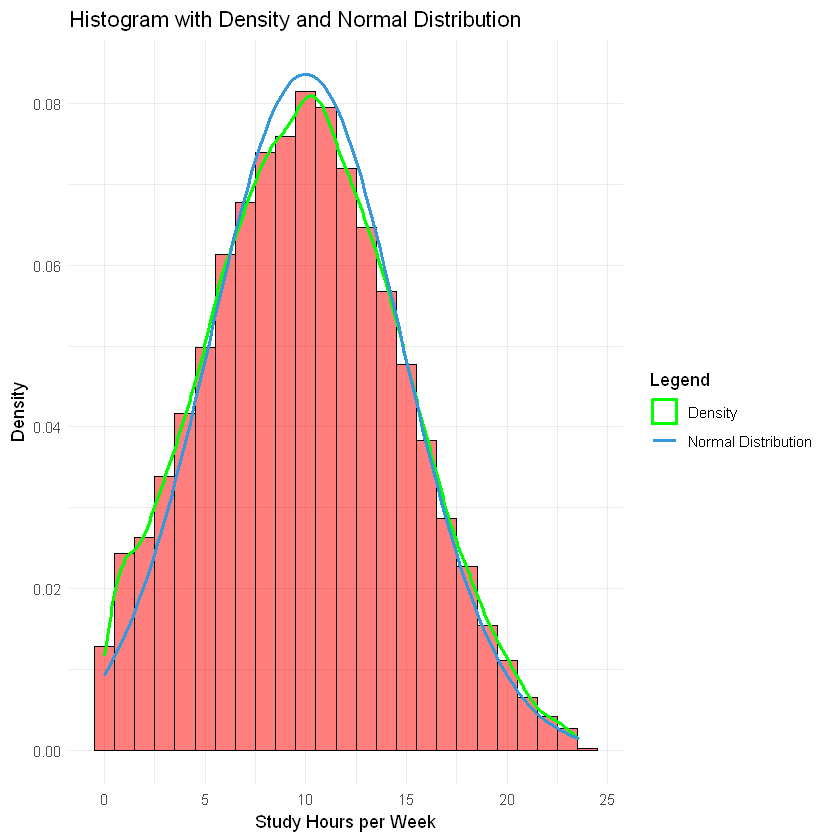

In [70]:
mu <- mean(df$study.hrs.perwk, na.rm = TRUE)
sigma <- sd(df$study.hrs.perwk, na.rm = TRUE)

ggplot(df, aes(x = study.hrs.perwk)) +
  geom_histogram(aes(y = ..density..), binwidth = 1, fill = "red", color = "black", alpha = 0.5) +
  geom_density(aes(color = "Density"), size = 1) +
  stat_function(fun = dnorm, args = list(mean = mu, sd = sigma), aes(color = "Normal Distribution"), size = 1) +
  labs(x = "Study Hours per Week", y = "Density",
       title = "Histogram with Density and Normal Distribution") +
  scale_color_manual(name = "Legend", 
                     values = c("Density" = "green", "Normal Distribution" = "#3498DB"), 
                     labels = c("Density", "Normal Distribution")) +
  guides(fill = "none") + 
  theme_minimal() +
  theme(legend.position = "right")

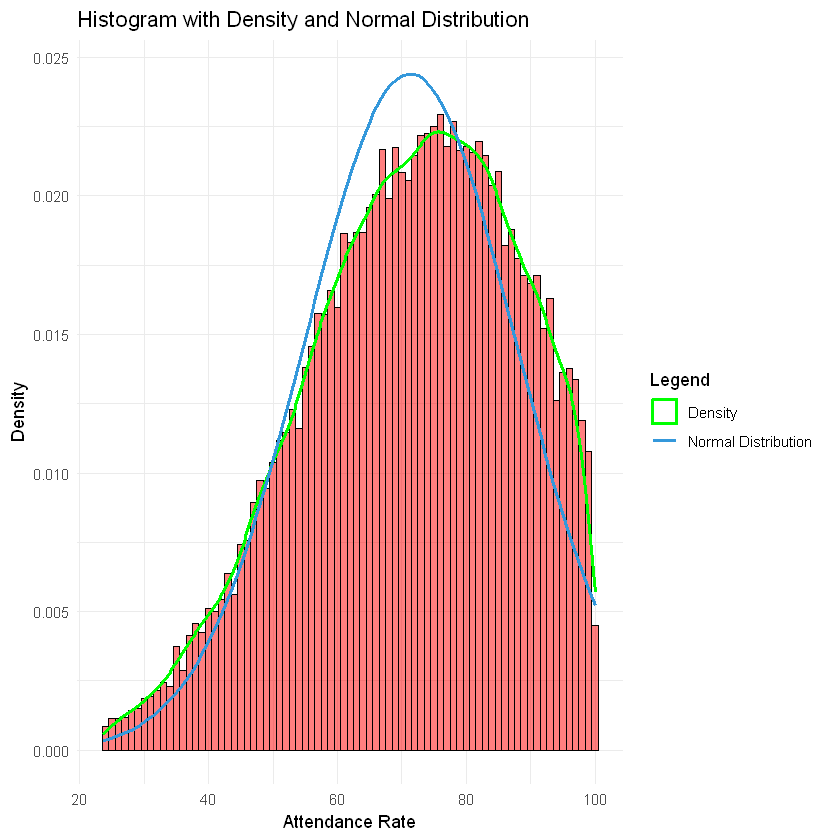

In [71]:
mu <- mean(df$attendance.rate, na.rm = TRUE)
sigma <- sd(df$attendance.rate, na.rm = TRUE)

ggplot(df, aes(x = attendance.rate)) +
  geom_histogram(aes(y = ..density..), binwidth = 1, fill = "red", color = "black", alpha = 0.5) +
  geom_density(aes(color = "Density"), size = 1) +
  stat_function(fun = dnorm, args = list(mean = mu, sd = sigma), aes(color = "Normal Distribution"), size = 1) +
  labs(x = "Attendance Rate", y = "Density",
       title = "Histogram with Density and Normal Distribution") +
  scale_color_manual(name = "Legend", 
                     values = c("Density" = "green", "Normal Distribution" = "#3498DB"), 
                     labels = c("Density", "Normal Distribution")) +
  guides(fill = "none") + 
  theme_minimal() +
  theme(legend.position = "right")

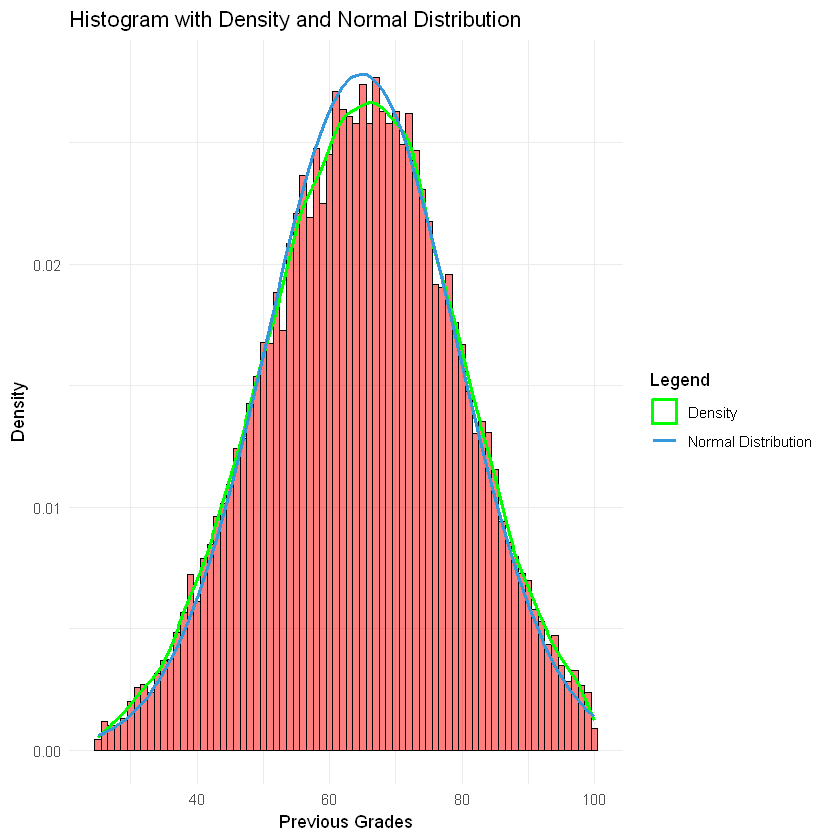

In [72]:
mu <- mean(df$previous.grades, na.rm = TRUE)
sigma <- sd(df$previous.grades, na.rm = TRUE)

ggplot(df, aes(x = previous.grades)) +
  geom_histogram(aes(y = ..density..), binwidth = 1, fill = "red", color = "black", alpha = 0.5) +
  geom_density(aes(color = "Density"), size = 1) +
  stat_function(fun = dnorm, args = list(mean = mu, sd = sigma), aes(color = "Normal Distribution"), size = 1) +
  labs(x = "Previous Grades", y = "Density",
       title = "Histogram with Density and Normal Distribution") +
  scale_color_manual(name = "Legend", 
                     values = c("Density" = "green", "Normal Distribution" = "#3498DB"), 
                     labels = c("Density", "Normal Distribution")) +
  guides(fill = "none") + 
  theme_minimal() +
  theme(legend.position = "right")

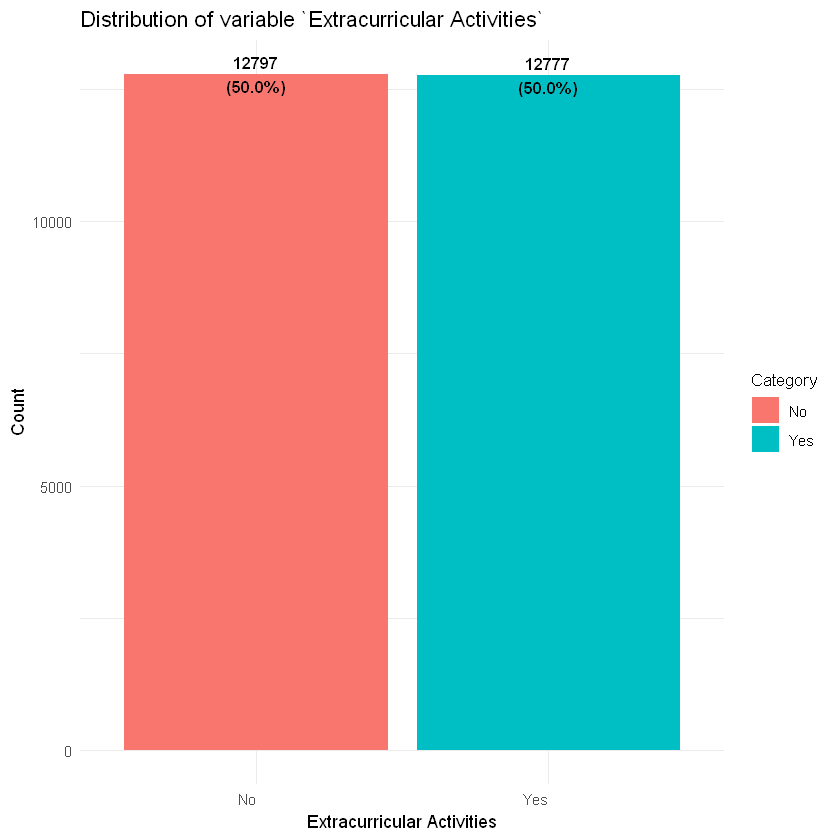

In [73]:
freq_table <- as.data.frame(table(df$extracurricular.activities))

freq_table <- freq_table %>%
  mutate(percentage = Freq / sum(Freq) * 100)

colnames(freq_table) <- c("Category", "Count", "Percentage")

ggplot(freq_table, aes(x = Category, y = Count, fill = Category)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = sprintf("%d\n(%.1f%%)", Count, Percentage)), 
            vjust = 0.5, hjust = 0.5, color = "black", size = 3.5, fontface = "bold") +
  theme_minimal() +
  labs(x = "Extracurricular Activities", y = "Count",
       title = "Distribution of variable `Extracurricular Activities`") +
  theme(axis.text.x = element_text(hjust = 1),
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 9))

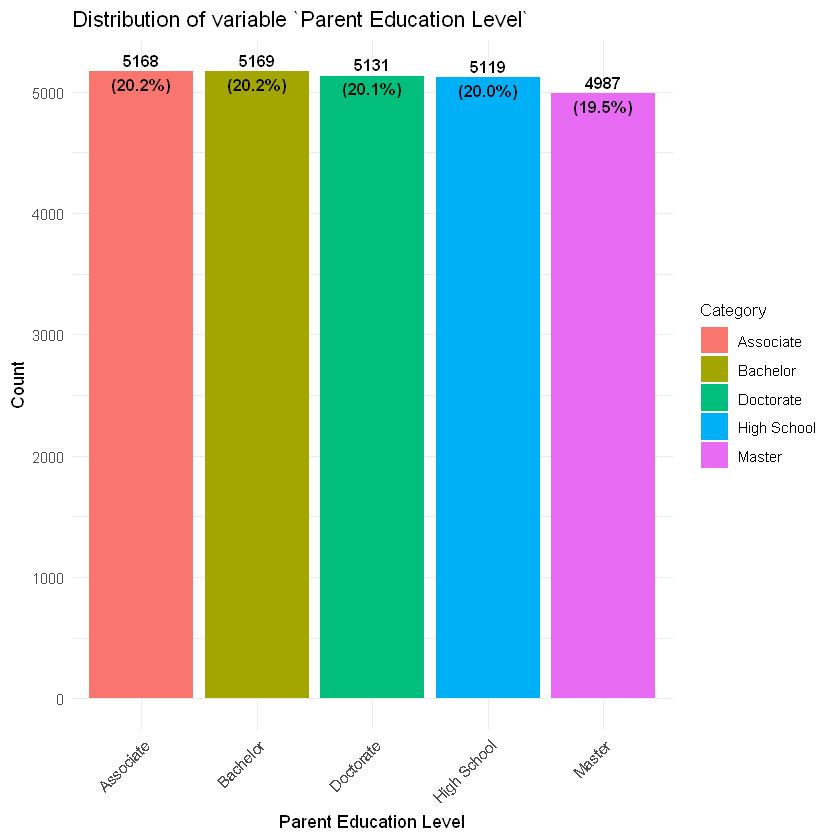

In [74]:
freq_table <- as.data.frame(table(df$parent.edu.level))

freq_table <- freq_table %>%
  mutate(percentage = Freq / sum(Freq) * 100)

colnames(freq_table) <- c("Category", "Count", "Percentage")

ggplot(freq_table, aes(x = Category, y = Count, fill = Category)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = sprintf("%d\n(%.1f%%)", Count, Percentage)), 
            vjust = 0.5, hjust = 0.5, color = "black", size = 3.5, fontface = "bold") +
  theme_minimal() +
  labs(x = "Parent Education Level", y = "Count",
       title = "Distribution of variable `Parent Education Level`") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 9))

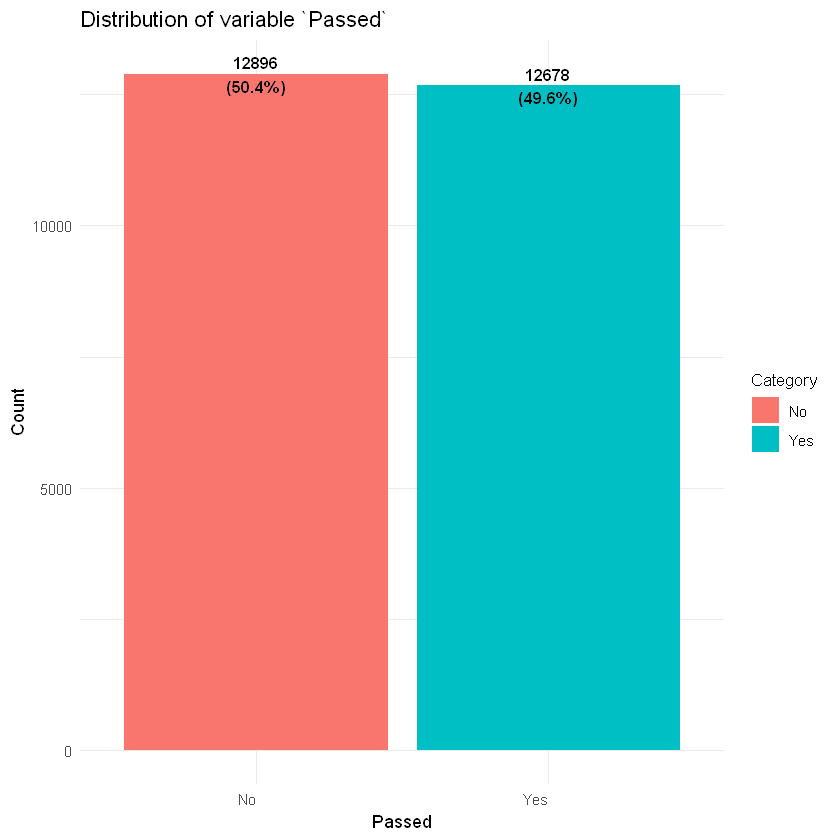

In [75]:
freq_table <- as.data.frame(table(df$passed))

freq_table <- freq_table %>%
  mutate(percentage = Freq / sum(Freq) * 100)

colnames(freq_table) <- c("Category", "Count", "Percentage")

ggplot(freq_table, aes(x = Category, y = Count, fill = Category)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = sprintf("%d\n(%.1f%%)", Count, Percentage)), 
            vjust = 0.5, hjust = 0.5, color = "black", size = 3.5, fontface = "bold") +
  theme_minimal() +
  labs(x = "Passed", y = "Count",
       title = "Distribution of variable `Passed`") +
  theme(axis.text.x = element_text(hjust = 1),
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 9))

# 4. Correlation Analysis

,study.hrs.perwk,attendance.rate,previous.grades
study.hrs.perwk,1.000000000,0.003702887,0.005543807
attendance.rate,0.003702887,1.000000000,-0.001650957
previous.grades,0.005543807,-0.001650957,1.000000000


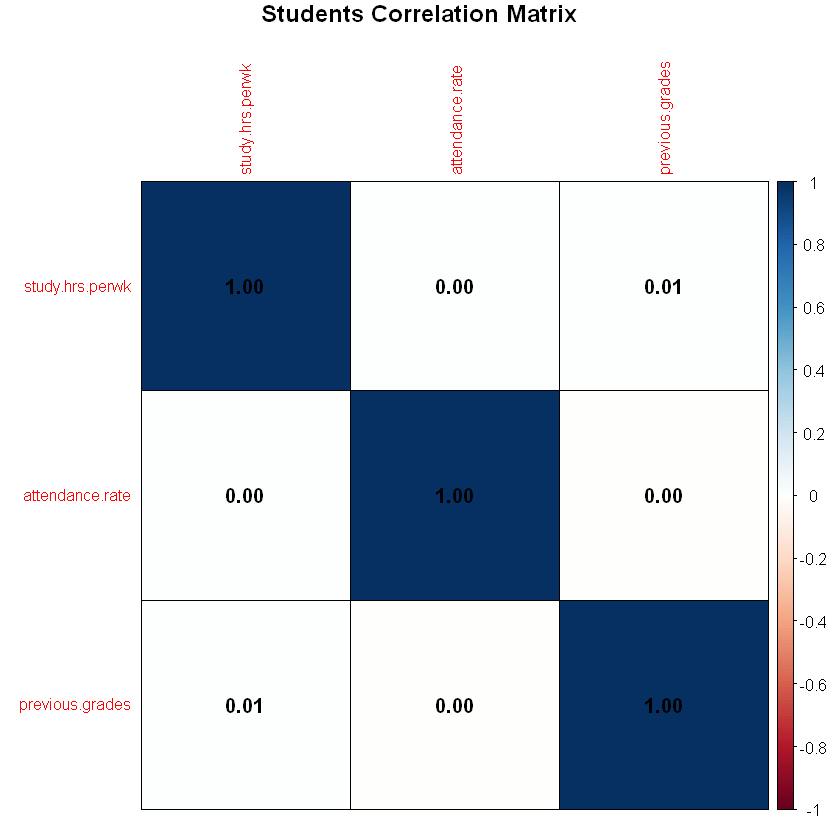

In [76]:
df_numerical <- df[, sapply(df, is.numeric)]

ce <- cor(df_numerical, use = "complete.obs")
ce

corrplot(ce, method = "color",
         mar = c(0, 0, 1, 0),
         addgrid.col = TRUE,
         addCoef.col = "black",
         tl.cex = 0.8,
         title = "Students Correlation Matrix")

# 5. Group Density and Comparison

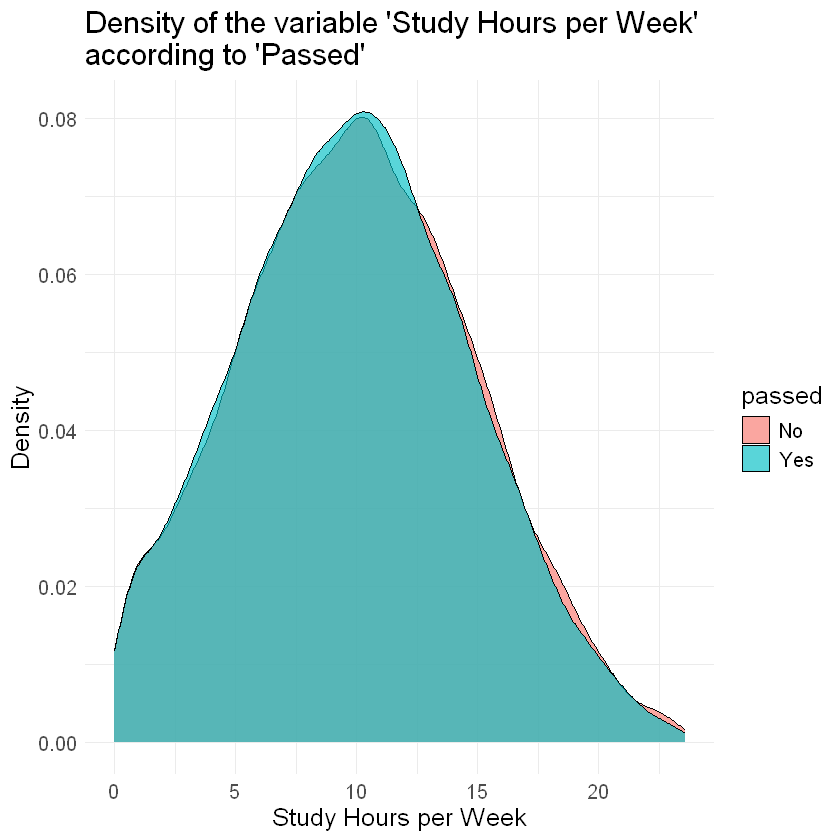

In [77]:
ggplot(df, aes(x = study.hrs.perwk, fill = passed)) +
  geom_density(alpha = .65) +
  theme_minimal() +
  theme(text = element_text(size = 15)) +
  labs(title = "Density of the variable 'Study Hours per Week' \naccording to 'Passed'",
       x = "Study Hours per Week", y = "Density")

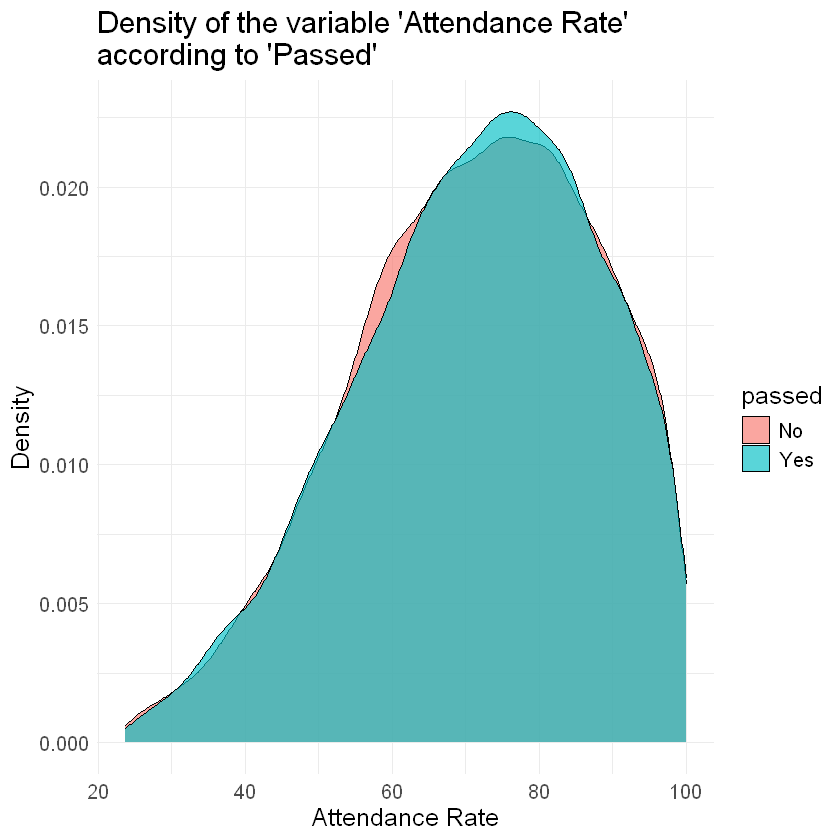

In [78]:
ggplot(df, aes(x = attendance.rate, fill = passed)) +
  geom_density(alpha = .65) +
  theme_minimal() +
  theme(text = element_text(size = 15)) +
  labs(title = "Density of the variable 'Attendance Rate' \naccording to 'Passed'",
       x = "Attendance Rate", y = "Density")

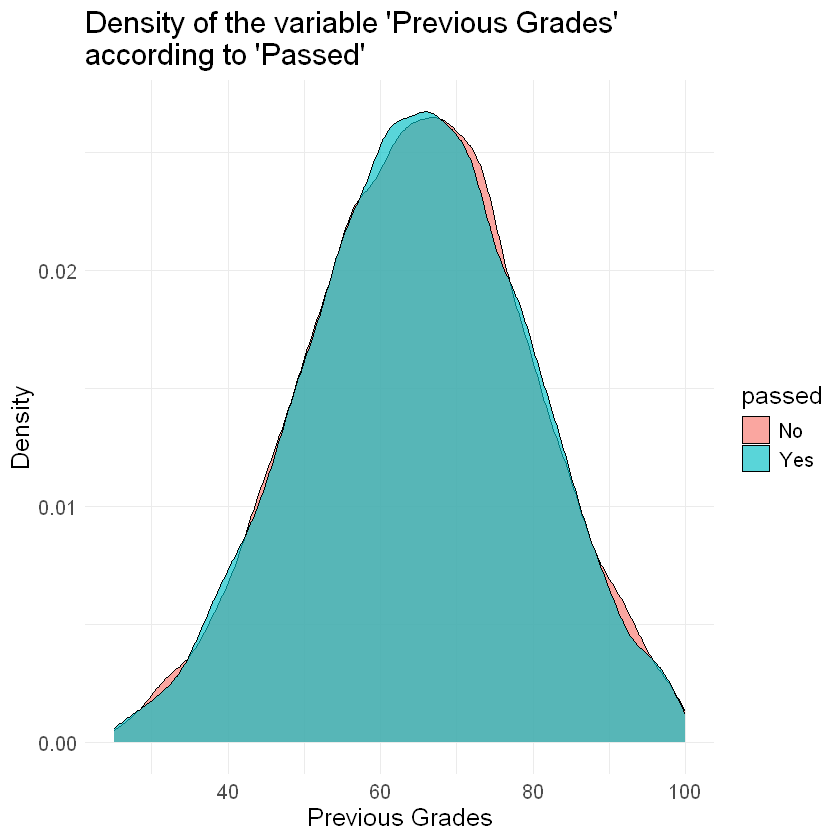

In [79]:
ggplot(df, aes(x = previous.grades, fill = passed)) +
  geom_density(alpha = .65) +
  theme_minimal() +
  theme(text = element_text(size = 15)) +
  labs(title = "Density of the variable 'Previous Grades' \naccording to 'Passed'",
       x = "Previous Grades", y = "Density")

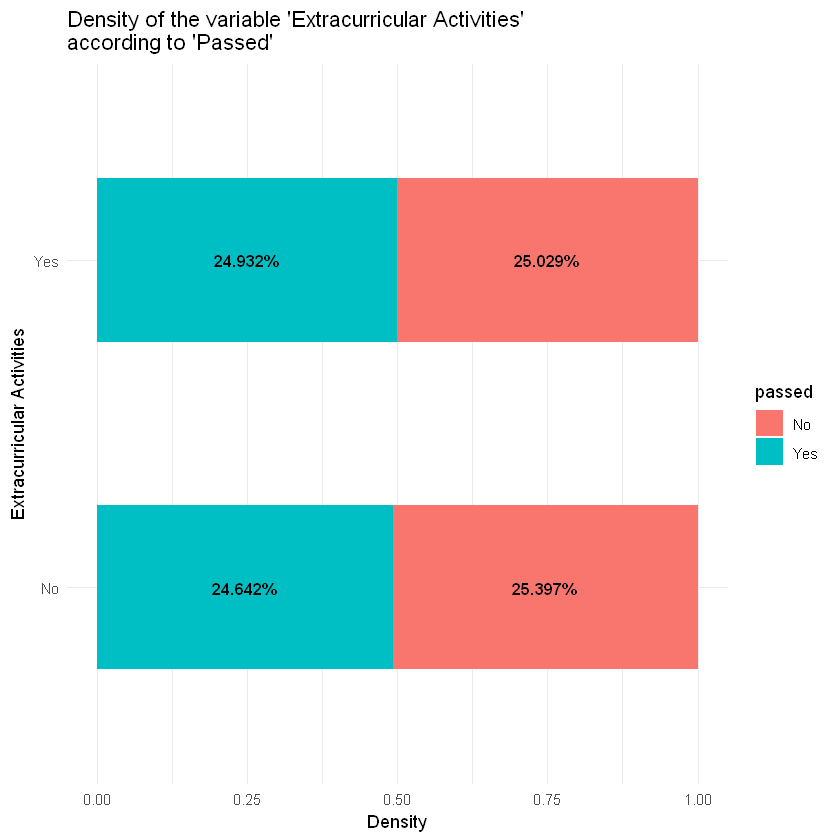

In [80]:
ggplot(df, aes(x = extracurricular.activities, fill = passed)) +
  geom_bar(position = "fill", width = 0.5) +  # position="fill" shows proportions
  coord_flip() +
  geom_text(
    stat = "count",  # Count the observations
    aes(label = scales::percent(after_stat(count) / sum(after_stat(count)))),
    position = position_fill(vjust = 0.5),  # Position the text in the center of the bars
    color = "black",  # Text color
    fontface = "bold",
    size = 3.5  # Text size
  ) +
  labs(y = "Density", x = "Extracurricular Activities", fill = "passed",
  title = "Density of the variable 'Extracurricular Activities' \naccording to 'Passed'") +
  theme_minimal()

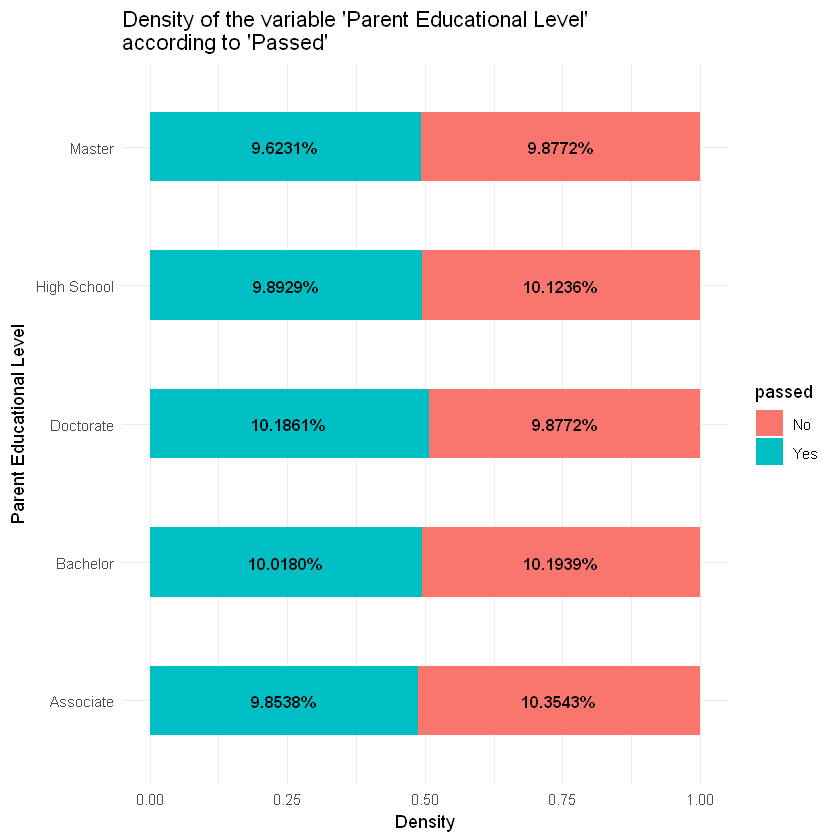

In [81]:
ggplot(df, aes(x = parent.edu.level, fill = passed)) +
  geom_bar(position = "fill", width = 0.5) +  # position="fill" shows proportions
  coord_flip() +
  geom_text(
    stat = "count",  # Count the observations
    aes(label = scales::percent(after_stat(count) / sum(after_stat(count)))),
    position = position_fill(vjust = 0.5),  # Position the text in the center of the bars
    color = "black",  # Text color
    fontface = "bold",
    size = 3.5  # Text size
  ) +
  labs(y = "Density", x = "Parent Educational Level", fill = "passed",
  title = "Density of the variable 'Parent Educational Level' \naccording to 'Passed'") +
  theme_minimal()

# 6. Outliers

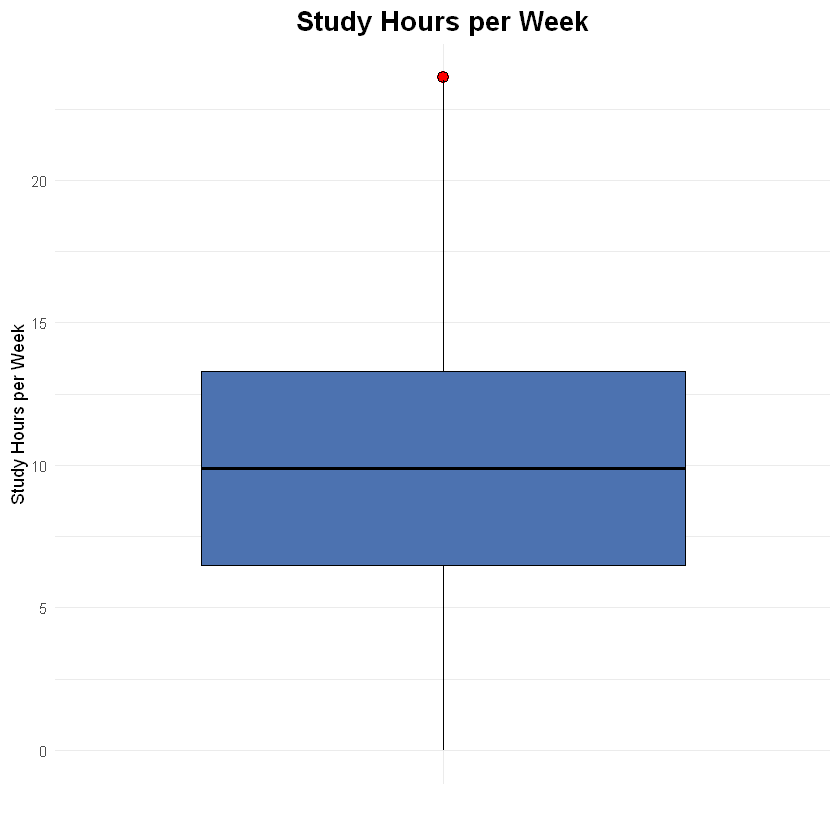

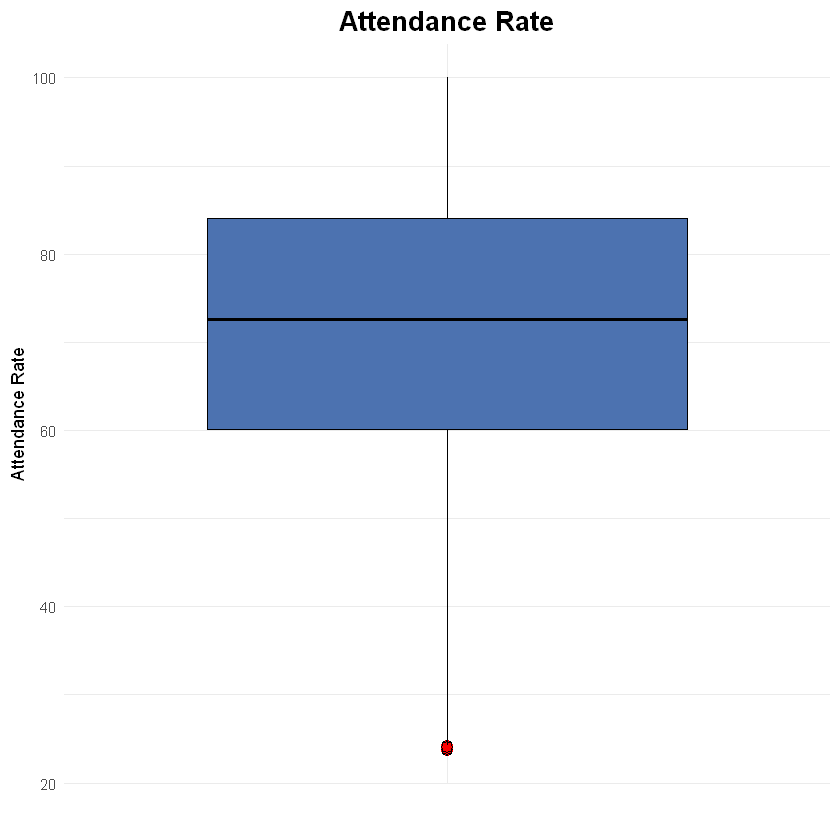

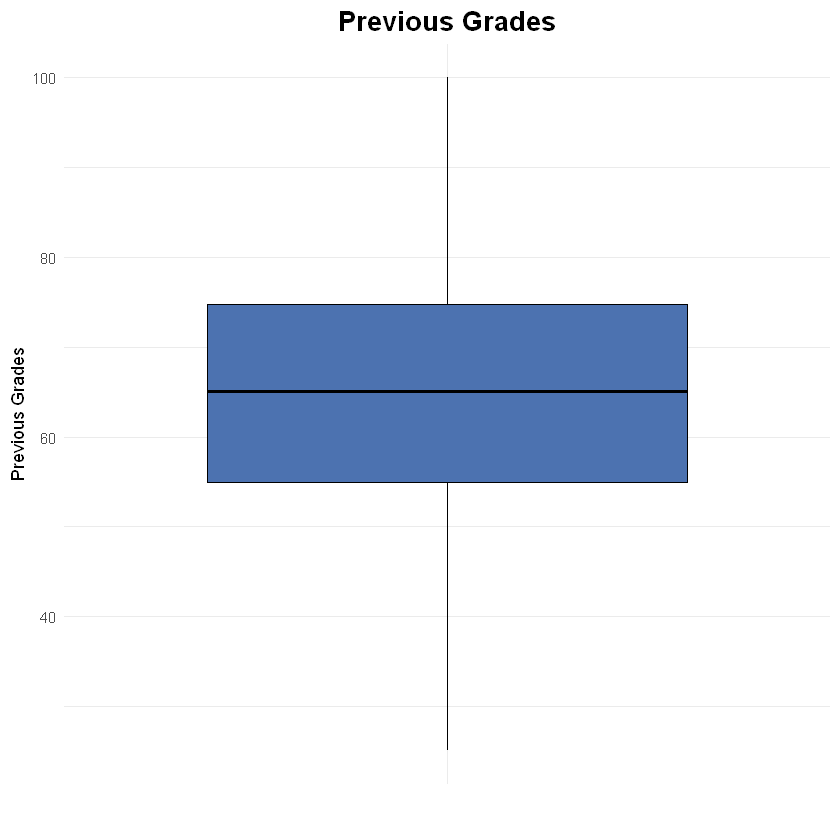

In [82]:
ggplot(df, aes(x = "", y = study.hrs.perwk)) +
  geom_boxplot(fill = "#4C72B0", color = "black", outlier.shape = 21, 
               outlier.fill = "red", outlier.size = 3) +
  labs(title = "Study Hours per Week",
       x = "",
       y = "Study Hours per Week") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16)
  )

ggplot(df, aes(x = "", y = attendance.rate)) +
  geom_boxplot(fill = "#4C72B0", color = "black", outlier.shape = 21, 
               outlier.fill = "red", outlier.size = 3) +
  labs(title = "Attendance Rate",
       x = "",
       y = "Attendance Rate") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16)
  )

ggplot(df, aes(x = "", y = previous.grades)) +
  geom_boxplot(fill = "#4C72B0", color = "black", outlier.shape = 21, 
               outlier.fill = "red", outlier.size = 3) +
  labs(title = "Previous Grades",
       x = "",
       y = "Previous Grades") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16)
  )

# 7. Principal Component Analysis (PCA)

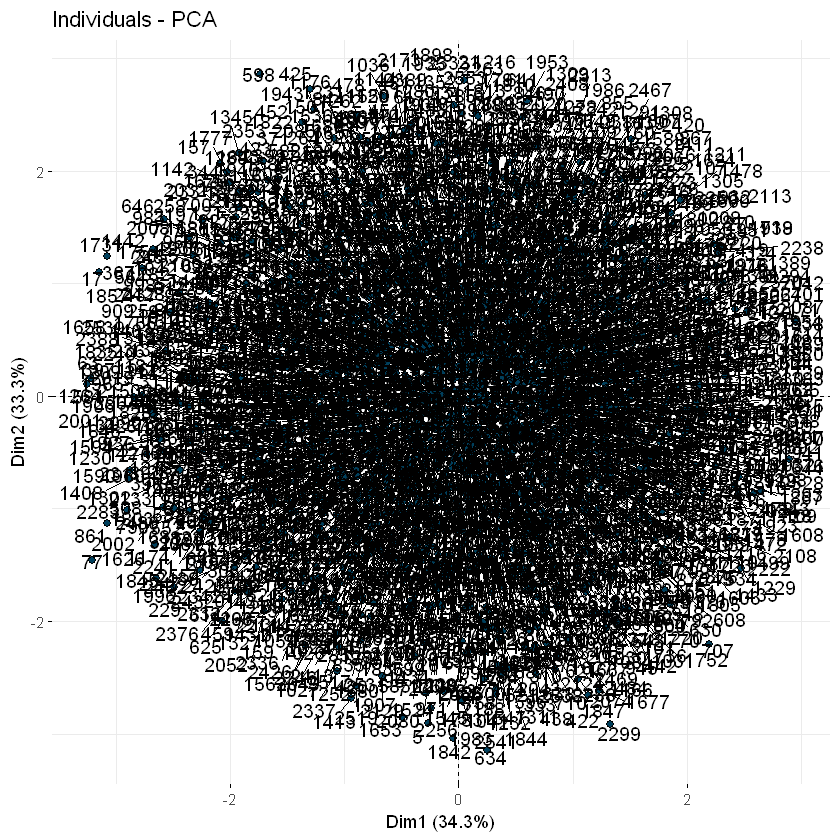

In [83]:
# make a sample of 10%
df_sample <- df_numerical %>% sample_frac(0.10)
pca_result <- PCA(df_sample, scale.unit = TRUE, ncp = 5, graph = FALSE)

fviz_pca_ind(pca_result, 
             pointsize = 2, 
             pointshape = 21, 
             fill = "#003f5c", 
             repel = TRUE)

In [84]:
str(df)

'data.frame':	25574 obs. of  6 variables:
 $ study.hrs.perwk           : num  9.3 17.6 8.8 8.8 17.9 13.8 7.7 1.4 7.2 4.9 ...
 $ attendance.rate           : num  95.3 76.8 89.3 73.8 38.6 95.8 54.1 66.5 54.4 71.1 ...
 $ previous.grades           : num  60.6 62.4 72.7 69.3 93.6 59.2 72.3 49.2 55.9 98 ...
 $ extracurricular.activities: Factor w/ 2 levels "No","Yes": 1 2 1 2 1 2 1 1 2 2 ...
 $ parent.edu.level          : Factor w/ 5 levels "Associate","Bachelor",..: 4 2 5 4 3 3 5 1 4 4 ...
 $ passed                    : Factor w/ 2 levels "No","Yes": 1 1 1 2 2 1 1 2 1 1 ...


In [85]:
df.quantitative <- df

# transforming "Yes" "No" to 1, 0
df.quantitative$extracurricular.activities <- ifelse(df.quantitative$extracurricular.activities == "No", 0, 1)
df.quantitative$passed <- ifelse(df.quantitative$passed == "No", 0, 1)

In [86]:
df.dummy <- dummy(df[-c(1,2,3,4,6)])

In [87]:
str(df.dummy)

'data.frame':	25574 obs. of  5 variables:
 $ parent.edu.level_Associate  : chr  "0" "0" "0" "0" ...
 $ parent.edu.level_Bachelor   : chr  "0" "1" "0" "0" ...
 $ parent.edu.level_Doctorate  : chr  "0" "0" "0" "0" ...
 $ parent.edu.level_High.School: chr  "1" "0" "0" "1" ...
 $ parent.edu.level_Master     : chr  "0" "0" "1" "0" ...


In [88]:
df.dummy.quantitative <- cbind(df.quantitative[, -5], df.dummy)
df.dummy.quantitative <- as.data.frame(lapply(df.dummy.quantitative, as.numeric))

In [89]:
str(df.dummy.quantitative)

'data.frame':	25574 obs. of  10 variables:
 $ study.hrs.perwk             : num  9.3 17.6 8.8 8.8 17.9 13.8 7.7 1.4 7.2 4.9 ...
 $ attendance.rate             : num  95.3 76.8 89.3 73.8 38.6 95.8 54.1 66.5 54.4 71.1 ...
 $ previous.grades             : num  60.6 62.4 72.7 69.3 93.6 59.2 72.3 49.2 55.9 98 ...
 $ extracurricular.activities  : num  0 1 0 1 0 1 0 0 1 1 ...
 $ passed                      : num  0 0 0 1 1 0 0 1 0 0 ...
 $ parent.edu.level_Associate  : num  0 0 0 0 0 0 0 1 0 0 ...
 $ parent.edu.level_Bachelor   : num  0 1 0 0 0 0 0 0 0 0 ...
 $ parent.edu.level_Doctorate  : num  0 0 0 0 1 1 0 0 0 0 ...
 $ parent.edu.level_High.School: num  1 0 0 1 0 0 0 0 1 1 ...
 $ parent.edu.level_Master     : num  0 0 1 0 0 0 1 0 0 0 ...


In [90]:
# create a sample of 10%
df.dummy.sample <- df.dummy.quantitative %>% sample_frac(0.10)
pca_result.dummy <- PCA(df.dummy.sample, scale.unit = TRUE, ncp = 5, graph = FALSE)

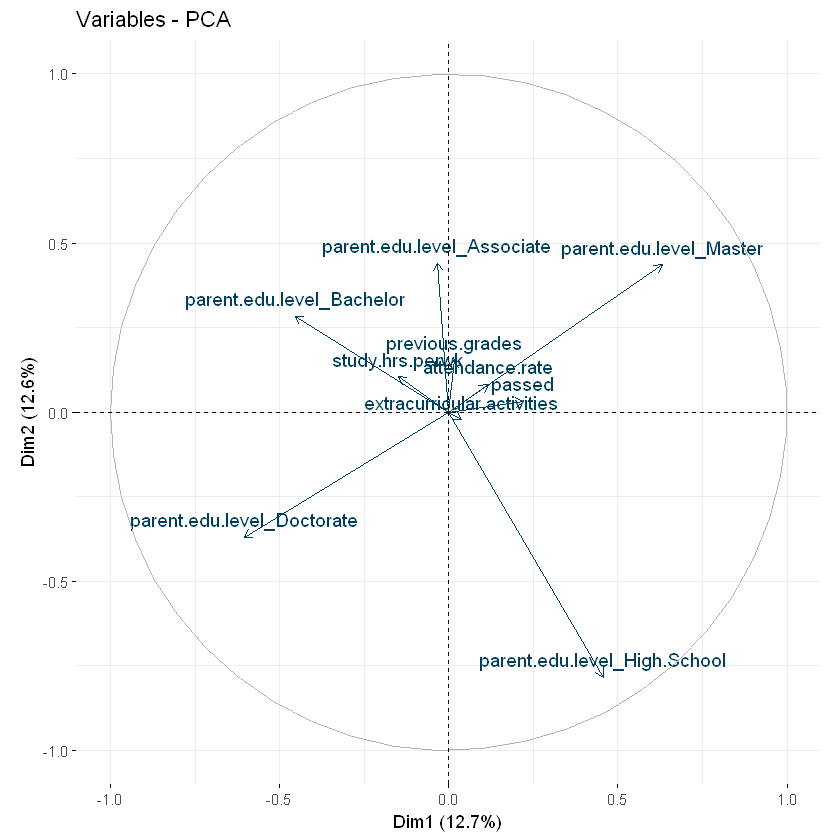

In [91]:
fviz_pca_var(pca_result.dummy,
             col.var = "#003f5c")

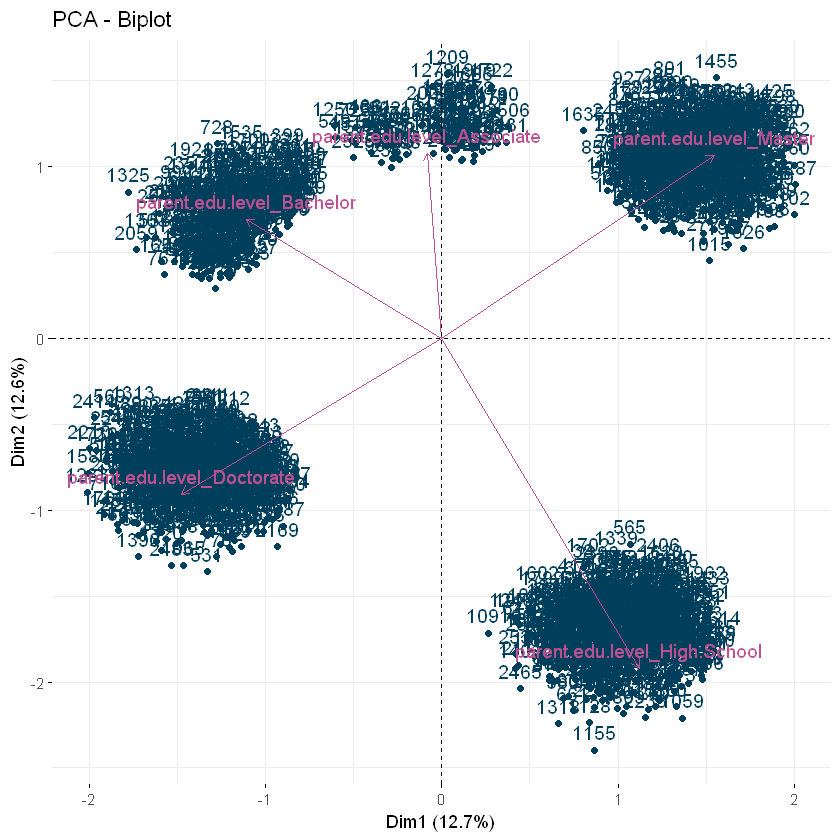

In [92]:
fviz_pca_biplot(pca_result.dummy, 
                col.var = "#bc5090",
                col.ind = "#003f5c",
                select.var = list(cos2 = 0.15),
                select.ind = list(cos2 = 0.15)
)

In [97]:
groups <- kmeans(df.dummy.quantitative, centers = 3, iter.max = 1000, nstart = 50)

centers <- groups$centers

rownames(centers) <- c("Cluster 1", "Cluster 2", "Cluster 3")
centers <- as.data.frame(centers)
maximos <- apply(centers, 2, max)
minimos <- apply(centers, 2, min)
centers <- rbind(minimos, centers)
centers <- rbind(maximos, centers)

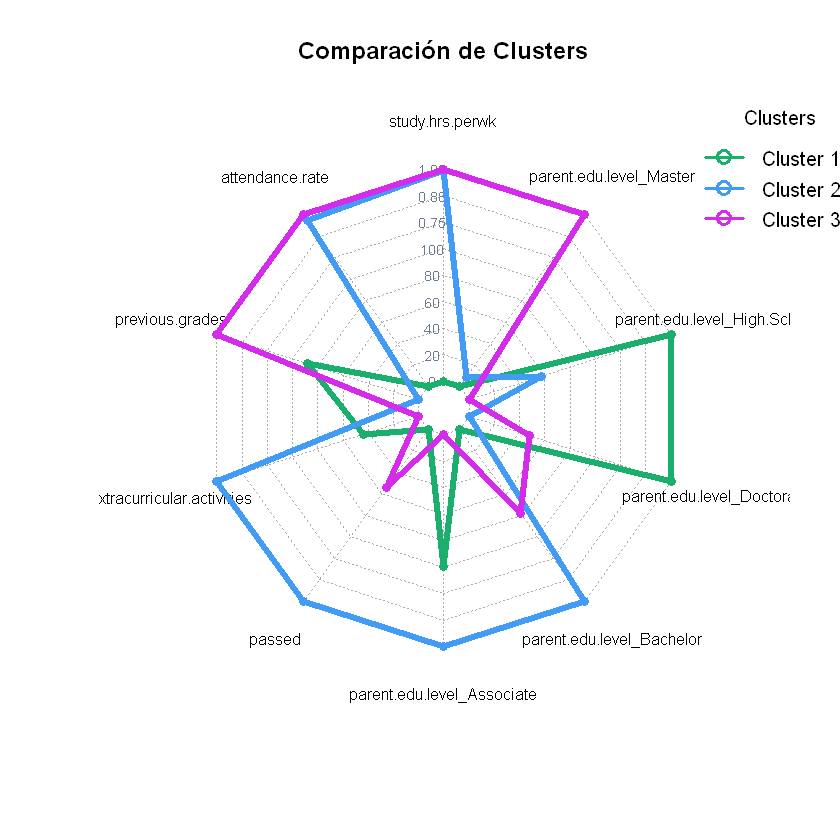

In [101]:
color <- c("#1aaf6c", "#429bf4", "#d42cea")

radarchart(as.data.frame(centers), maxmin=TRUE, axistype=4,
           axislabcol="slategray4", centerzero=FALSE, seg=8,
           cglcol="gray67", pcol=color, plty=1, plwd=5, 
           title="Comparación de Clusters",
           vlcex=0.8,
           caxislabels=seq(0, 100, 20),
           calcex=0.7)

legend("topright", inset=c(-0.1, 0), legend=c("Cluster 1", "Cluster 2", "Cluster 3"),
       title="Clusters", pch=21, bty="n", lwd=3, y.intersp=1.2, 
       horiz=FALSE, col=color, pt.cex=1.5, text.col="black", xpd=TRUE)